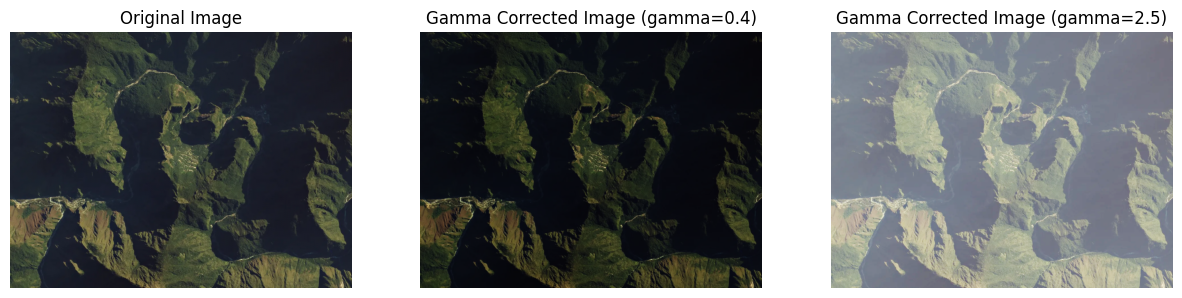

In [31]:
'''Gamma correction implementation example.'''
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [15, 5]

def gamma_correction(img, gamma):
    rows, cols, channels = img.shape
    out = np.zeros_like(img)
    for r in range(rows):
        for c in range(cols):
            for ch in range(channels):
                out[r, c, ch] = img[r, c, ch] ** gamma
    return out

sourceImagePath = '../../data/lesson_2/machu-picchu.webp'
# sourceImagePath = '../../data/lesson_2/akhtubinsk.webp'
# sourceImagePath = "../../data/lesson_2/solar-one.webp"
img = cv2.imread(sourceImagePath)
if img is None:
    raise FileNotFoundError(f"Image not found at {sourceImagePath}")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255.0


plt.subplot(131), plt.title("Original Image"), plt.imshow(img)
plt.axis("off")
plt.subplot(132), plt.title("Gamma Corrected Image (gamma=0.4)"), plt.imshow(gamma_correction(img, gamma=1.5))
plt.axis("off")
plt.subplot(133), plt.title("Gamma Corrected Image (gamma=2.5)"), plt.imshow(gamma_correction(img, gamma=1/3))
plt.axis("off")
plt.show()

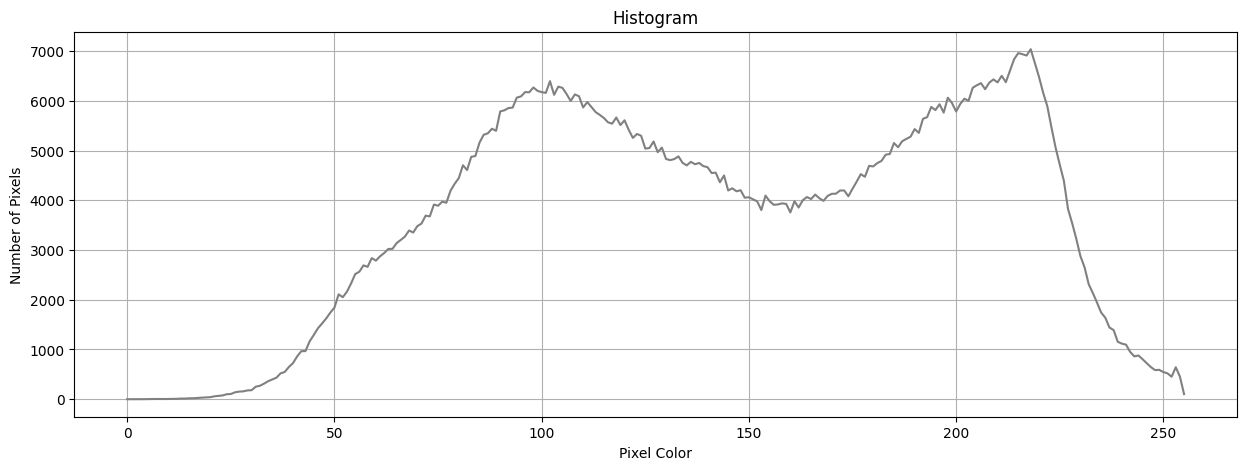

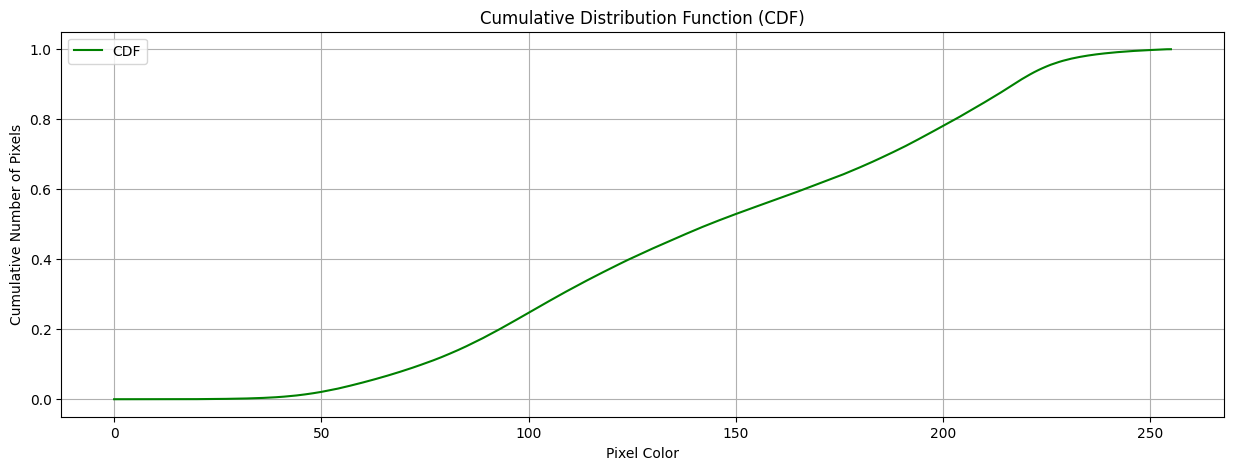

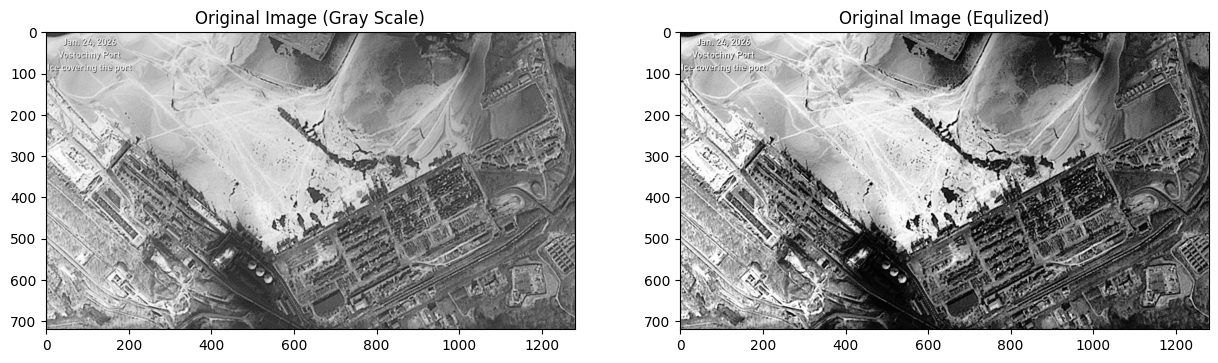

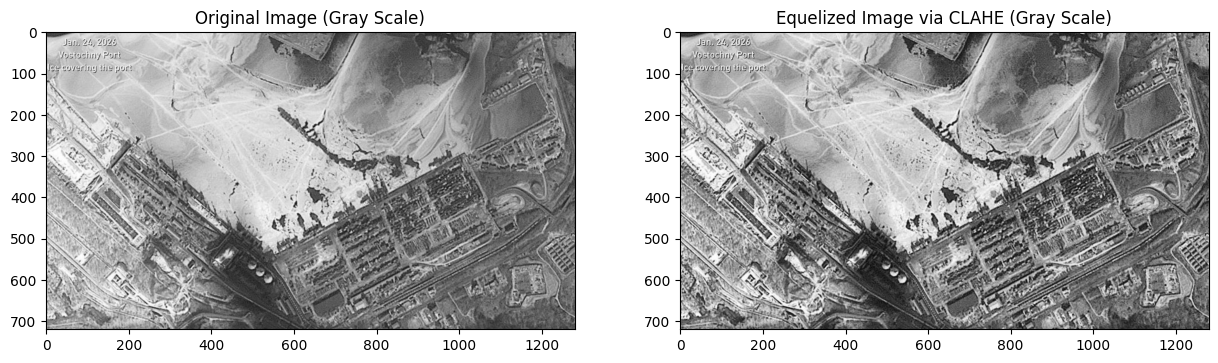

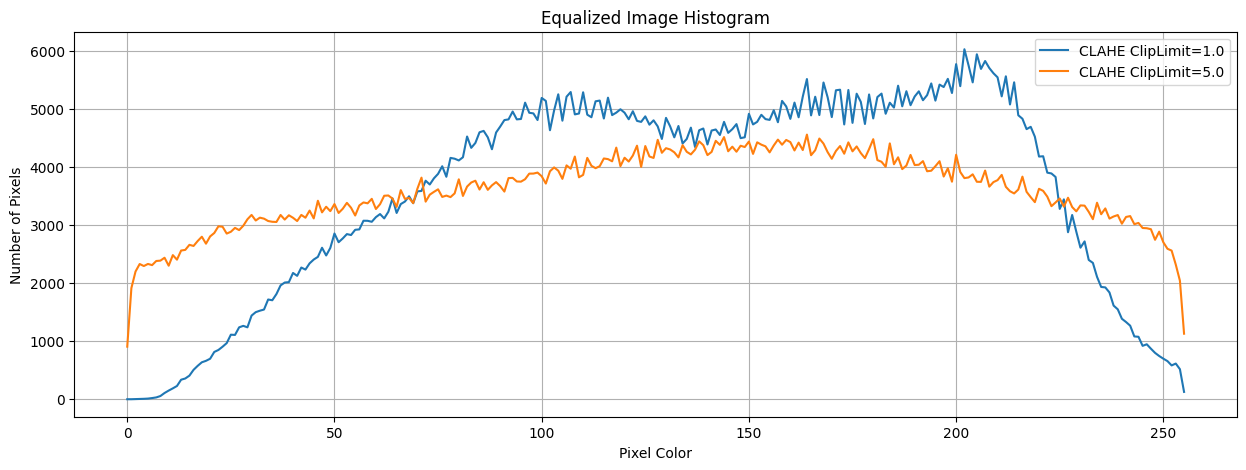

In [ ]:
'''Gray Scale Equalization and CLAHE example.'''
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
# sourceImagePath = '../../data/lesson_2/machu-picchu.webp'
sourceImagePath = '../../data/lesson_2/vostochny.jpg'
# sourceImagePath = '../../data/lesson_2/solar-one.webp'
img = cv2.imread(sourceImagePath)
if img is None:
    raise FileNotFoundError(f"Image not found at {sourceImagePath}")
imgOriginalRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rows, cols = img.shape
hist = np.histogram(img, bins=256, range=(0, 256))[0]

cdf = np.cumsum(hist/np.sum(hist))

equelized = cv2.equalizeHist(img)

# Plot histogram and CDF
plt.grid(True)
plt.plot(hist, color='gray', label='Histogram')
plt.xlabel('Pixel Color')
plt.ylabel('Number of Pixels')
plt.title('Histogram')
plt.show()

plt.plot(cdf, color='green', label='CDF')
plt.grid(True)
plt.xlabel('Pixel Color')
plt.ylabel('Cumulative Number of Pixels')
plt.title('Cumulative Distribution Function (CDF)')
plt.legend()
plt.show()

# Display the original image gray scale
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image (Gray Scale)')
plt.subplot(122), plt.imshow(equelized, cmap='gray')
plt.title('Original Image (Equlized)')
plt.show()

claheGray = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8, 8))
claheGray5 = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(8, 8))
plt.subplot(121), plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image (Gray Scale)')
plt.subplot(122), plt.imshow(claheGray.apply(img), cmap='gray', vmin=0, vmax=255)
plt.title('Equelized Image via CLAHE (Gray Scale)')
plt.show()


equelizedHist = np.histogram(claheGray.apply(img), bins=256, range=(0, 256))[0]
plt.subplot(111)
plt.plot(equelizedHist)
plt.title('Equalized Image Histogram')
plt.xlabel('Pixel Color')
plt.ylabel('Number of Pixels')
plt.grid(True)
plt.subplot(111)
plt.plot(np.histogram(claheGray5.apply(img), bins=256, range=(0, 256))[0])
plt.legend(['CLAHE ClipLimit=1.0', 'CLAHE ClipLimit=10.0'])
plt.show()

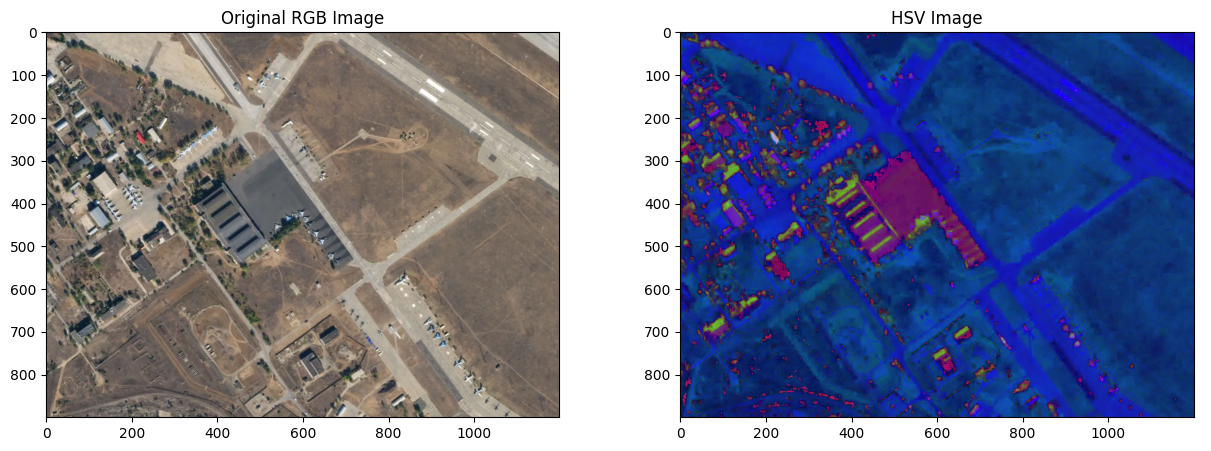

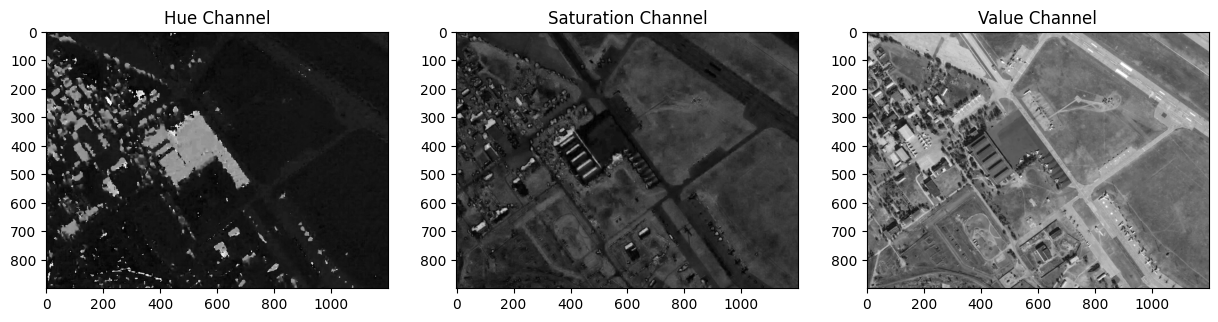

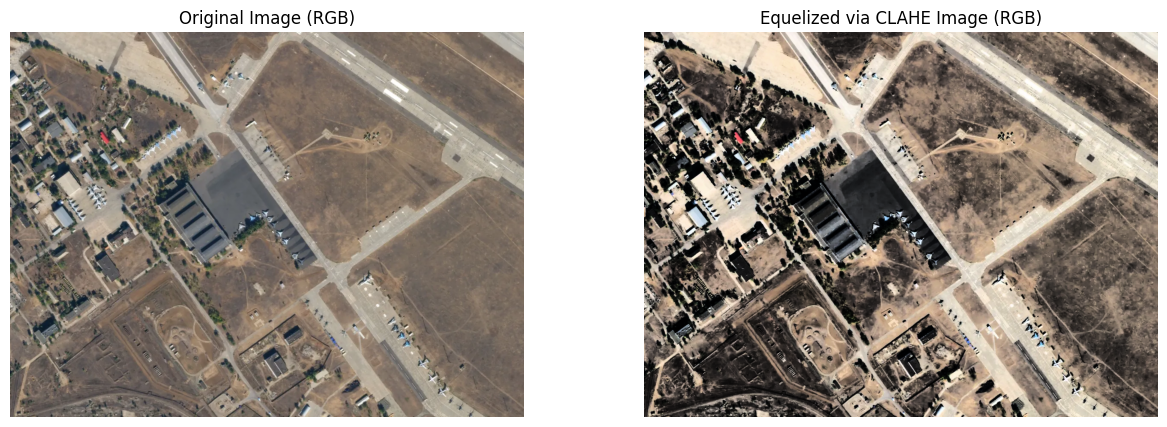

In [35]:
'''Color Equalization and CLAHE example.'''
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [15, 5]
# sourceImagePath = '../../data/lesson_2/machu-picchu.webp'
sourceImagePath = '../../data/lesson_2/akhtubinsk.webp'
# sourceImagePath = "../../data/lesson_2/solar-one.webp"
img = cv2.imread(sourceImagePath)
if img is None:
    raise FileNotFoundError(f"Image not found at {sourceImagePath}")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.axis("off")
plt.subplot(121), plt.title("Original RGB Image"), plt.imshow(img)
plt.subplot(122), plt.title("HSV Image"), plt.imshow(imgHSV)
plt.show()

hue, saturation, value = cv2.split(imgHSV)
plt.subplot(131), plt.title("Hue Channel"), plt.imshow(hue, cmap="gray")
plt.subplot(132), plt.title("Saturation Channel"), plt.imshow(saturation, cmap="gray")
plt.subplot(133), plt.title("Value Channel"), plt.imshow(value, cmap="gray")
plt.show()

clip = False


def equelize(channel, clip, clipLimit=2.0, tileGridSize=(8, 8)):
    '''apply CLAHE or standard histogram equalization to a single channel'''
    if clip:
        clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
        return clahe.apply(channel)
    else:
        return cv2.equalizeHist(channel)

value = equelize(value, clip, clipLimit=2.0, tileGridSize=(8, 8))
equelizedHSV = cv2.merge([hue, saturation, value])
equelizedRGB = cv2.cvtColor(equelizedHSV, cv2.COLOR_HSV2RGB)

plt.subplot(121)
plt.axis("off")
plt.imshow(img)
plt.title("Original Image (RGB)")
plt.subplot(122)
plt.axis("off")
plt.imshow(equelizedRGB)
plt.title("Equelized via CLAHE Image (RGB)")
plt.show()